In [318]:
from game import Game
import pandas
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import numpy as np
from scipy.spatial import Delaunay

In [152]:
def minimal_counting():
    res = defaultdict(list)
    for inter in range(10, 100, 2):
        game = Game({'star': ['r', 'l'], 'triangle': ['r'], 'circle': ['l']}, rounds=inter)
        for _ in range(100):
            sc = []
            for r in range(inter):
                stimulus, context = game.generate_sc()
                sc.append(f'{stimulus}-{context}')
            # convert list to dictionary of counts
            sc = {i:sc.count(i) for i in sc}
            res[inter].append(sc)
    return res

In [153]:
res = minimal_counting()

In [165]:
# for each index in res convert the list of dictionaries to a dataframe
dfs = []
for _ in res.keys():
    df = pandas.DataFrame(res[_])


In [166]:
# concatenate all the dataframes from dfs ito one dataframe with a column for a number of trials
df = pandas.concat(dfs, keys=res.keys())
df.reset_index(inplace=True)
df

,level_0,level_1,stimulus-context,count
0,10,0,star-r,2.0
1,10,1,star-r,1.0
2,10,2,star-r,NaN
3,10,3,star-r,1.0
4,10,4,star-r,5.0
...,...,...,...,...
17995,98,395,star-l,20.0
17996,98,396,star-l,19.0
17997,98,397,star-l,22.0
17998,98,398,star-l,15.0


In [139]:
# convert sc into a long format dataframe
sc = pandas.DataFrame(sc).stack().reset_index()
sc.columns = ['stimulus-context', 'rounds', 'count']

In [140]:
# convert counts into percentages per rounds
sc['percentage'] = sc.groupby('rounds')['count'].apply(lambda x: x / x.sum())

/var/folders/1c/pphtjl397rnbdcp94xmwzkqr0000gn/T/ipykernel_80206/1952558385.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sc['percentage'] = sc.groupby('rounds')['count'].apply(lambda x: x / x.sum())


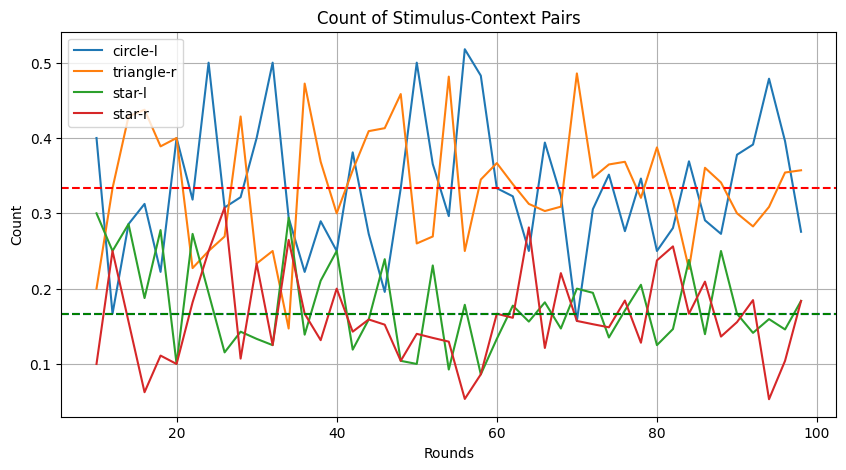

In [145]:
# plot counts per rounds
fig, ax = plt.subplots(figsize=(10, 5))
for k in sc['stimulus-context'].unique():
    ax.plot(sc[sc['stimulus-context'] == k]['rounds'], sc[sc['stimulus-context'] == k]['percentage'], label=k)
ax.legend()
ax.set_xlabel('Rounds')
ax.set_ylabel('Count')
ax.set_title('Count of Stimulus-Context Pairs')
plt.grid()
# order legend by alphabetical order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper left')
# plot true probabilities (triangle-r and circle-l are each 1/3 and star-r and star-l are each 1/6)
ax.axhline(y=1/3, color='r', linestyle='--')
ax.axhline(y=1/6, color='b', linestyle='--')
ax.axhline(y=1/6, color='g', linestyle='--')
plt.show()


In [72]:
data = pandas.read_json('logs/logging-20230323163703.json', orient='index')

In [73]:
# divide score by 2
data['score'] = data['score'] / 2

In [74]:
combinations = data[['word', 'stimulus_out']]

In [75]:
# convert combinations into a matrix that counts appearance of each combination
combinations = combinations.groupby(['word', 'stimulus_out']).size().unstack(fill_value=0)

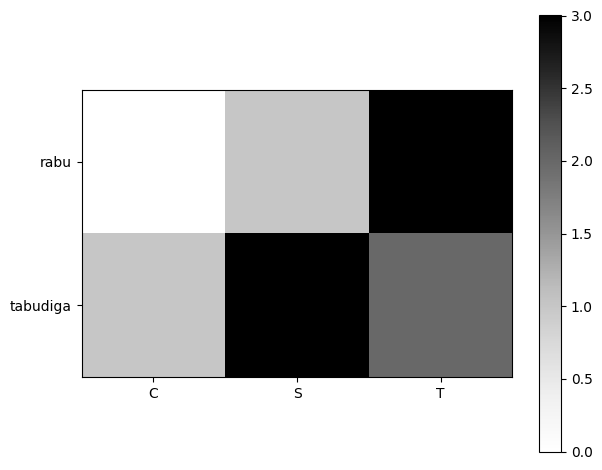

In [76]:
# plot the matrix using matplotlib heatmap
plt.imshow(combinations, cmap='hot', interpolation='nearest')
# add index and column labels
_ = plt.xticks(range(len(combinations.columns)), combinations.columns)
_ = plt.yticks(range(len(combinations.index)), combinations.index)
# set colosheme to blues
_ = plt.set_cmap('Greys')
# add colorbar
_ = plt.colorbar()
# compact layout
_ = plt.tight_layout()
